In [131]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the data
data = pd.read_csv(r'C:\Users\isabe\INDE 577\INDE-577\global_termite_microbe_wd.csv')

# Filter the data where termite discovery is 1
filtered_data = data[data['termite_discovery'] == 1]

# Drop the 'termite_discovery' column as it's no longer needed
filtered_data = filtered_data.drop(['termite_discovery'], axis=1)

# Drop rows where 'termite_damage' is NaN
filtered_data = filtered_data.dropna(subset=['termite_damage'])

# Convert 'deployment_date' and 'harvest_date' to datetime and calculate duration in days
filtered_data['deployment_date'] = pd.to_datetime(filtered_data['deployment_date']).dt.tz_localize(None)
filtered_data['harvest_date'] = pd.to_datetime(filtered_data['harvest_date']).dt.tz_localize(None)
filtered_data['duration_days'] = (filtered_data['harvest_date'] - filtered_data['deployment_date']).dt.days

# Drop the original date columns
filtered_data = filtered_data.drop(['deployment_date', 'harvest_date'], axis=1)

# Identify and encode categorical columns
categorical_columns = ['country', 'site', 'habitat_type', 'wood_used', 'wood_origin', 'treatment', 'plot', 'tag']
filtered_data = pd.get_dummies(filtered_data, columns=categorical_columns)

# Scale numerical columns
numerical_columns = ['latitude', 'longitude', 'N_pc', 'C_pc', 'P_pc', 'Mg_pc', 'Ca_pc', 'K_pc', 'Al_pc', 'Mn_pc', 'date_diff', 'initial_wt', 'final_wt', 'k_value', 'duration_days']
scaler = StandardScaler()
filtered_data[numerical_columns] = scaler.fit_transform(filtered_data[numerical_columns])

# Prepare target for multi-class classification
encoder = OneHotEncoder()
y = encoder.fit_transform(filtered_data[['termite_damage']]).toarray()

# Split the data into features and target
X = filtered_data.drop(['termite_damage'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and compile the model for multi-class classification
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # Number of neurons equals the number of classes
])

optimizer = Adam(learning_rate=0.01)  # Adjust the learning rate here
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict and evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_test_classes, y_pred)
class_report = classification_report(y_test_classes, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Epoch 1/20


c:\Users\isabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2987 - loss: 1.3737 - val_accuracy: 0.3985 - val_loss: 1.3337
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3403 - loss: 1.3703 - val_accuracy: 0.3985 - val_loss: 1.3351
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3621 - loss: 1.3560 - val_accuracy: 0.3985 - val_loss: 1.3391
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3336 - loss: 1.3680 - val_accuracy: 0.3985 - val_loss: 1.3342
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3394 - loss: 1.3674 - val_accuracy: 0.3985 - val_loss: 1.3330
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3530 - loss: 1.3599 - val_accuracy: 0.3985 - val_loss: 1.3362
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3635 - loss: 1.3560 - val_accuracy: 0.3985 - val_loss: 1.3372
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3486 - loss: 1.3638 - val_accuracy: 0.3985 - val_loss: 1.3355
Epo

c:\Users\isabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\isabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\isabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

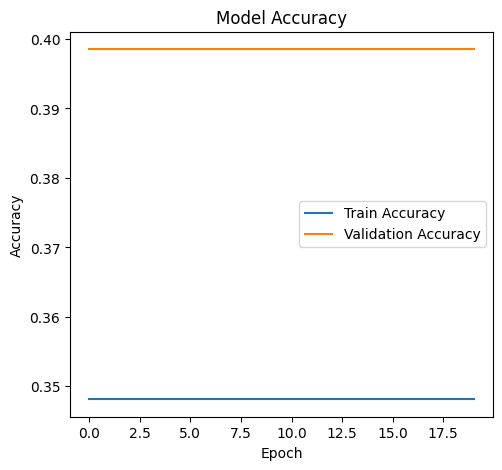

In [129]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

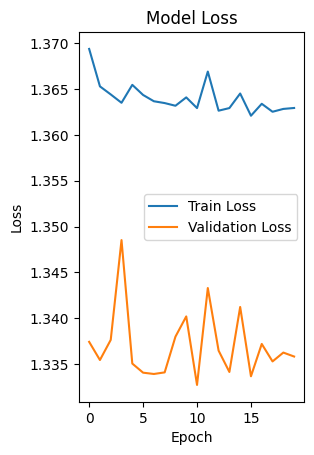

In [130]:
# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()